In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
mdf = pd.read_csv("./Data/PiskunovPreprocessed.csv")
mdf.info()
column_counts = mdf.eq(-1).sum()
print(column_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   B-V            9564 non-null   float64
 1   log.Teff [K]   9564 non-null   float64
 2   Absolute Mag   9564 non-null   float64
 3   Mass[solMass]  9564 non-null   float64
 4   Vmag           9564 non-null   float64
 5   Plx            9564 non-null   float64
 6   Age [yr]       9564 non-null   float64
 7   Distance       9564 non-null   float64
 8   logL           9564 non-null   float64
 9   Predicted_SpT  9564 non-null   object 
dtypes: float64(9), object(1)
memory usage: 747.3+ KB
B-V                0
log.Teff [K]       0
Absolute Mag       1
Mass[solMass]    203
Vmag               0
Plx                0
Age [yr]         878
Distance           0
logL               0
Predicted_SpT      0
dtype: int64


In [5]:
mdf = mdf[mdf['Mass[solMass]'] != -1]
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9361 entries, 0 to 9563
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   B-V            9361 non-null   float64
 1   log.Teff [K]   9361 non-null   float64
 2   Absolute Mag   9361 non-null   float64
 3   Mass[solMass]  9361 non-null   float64
 4   Vmag           9361 non-null   float64
 5   Plx            9361 non-null   float64
 6   Age [yr]       9361 non-null   float64
 7   Distance       9361 non-null   float64
 8   logL           9361 non-null   float64
 9   Predicted_SpT  9361 non-null   object 
dtypes: float64(9), object(1)
memory usage: 804.5+ KB


In [8]:
def assign_mass_range(mass):
    if 0 <= mass < 0.2:
        return 0
    elif 0.2 <= mass < 0.65:
        return 1
    elif 0.65 <= mass < 1:
        return 2
    elif 1 <= mass < 2:
        return 3
    elif 2 <= mass < 4:
        return 4
    elif 4 <= mass < 6:
        return 5
    elif 6 <= mass < 10:
        return 6
    elif 10 <= mass < 20:
        return 7
    elif 20 <= mass < 30:
        return 8
    elif 30 <= mass < 300:
        return 9
    else:
        return -1 
mdf['Mass Range'] = mdf['Mass[solMass]'].apply(assign_mass_range)
mdf.head()

,B-V,log.Teff [K],Absolute Mag,Mass[solMass],Vmag,Plx,Age [yr],Distance,logL,Predicted_SpT,Mass Range
0,1.24,3.750,0.39,3.96,11.54,0.000589,135000000.0,1698.243652,2.41,K,4
1,1.24,3.750,0.39,3.95,11.54,0.000589,137000000.0,1698.243652,2.41,K,4
2,0.40,4.133,0.53,4.48,11.68,0.000589,61200000.0,1698.243652,2.66,B,5
3,0.40,4.133,0.53,4.23,11.68,0.000589,86300000.0,1698.243652,2.66,B,5
4,0.40,4.133,0.53,4.22,11.68,0.000589,86700000.0,1698.243652,2.66,B,5


In [11]:
spectral_type_mapping = {
    "O": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "G": 4,
    "K": 5,
    "M": 6
}
mdf["PSpT"] = mdf["Predicted_SpT"].map(spectral_type_mapping)
mdf.head()

,B-V,log.Teff [K],Absolute Mag,Mass[solMass],Vmag,Plx,Age [yr],Distance,logL,Predicted_SpT,Mass Range,PSpT
0,1.24,3.750,0.39,3.96,11.54,0.000589,135000000.0,1698.243652,2.41,K,4,5
1,1.24,3.750,0.39,3.95,11.54,0.000589,137000000.0,1698.243652,2.41,K,4,5
2,0.40,4.133,0.53,4.48,11.68,0.000589,61200000.0,1698.243652,2.66,B,5,1
3,0.40,4.133,0.53,4.23,11.68,0.000589,86300000.0,1698.243652,2.66,B,5,1
4,0.40,4.133,0.53,4.22,11.68,0.000589,86700000.0,1698.243652,2.66,B,5,1


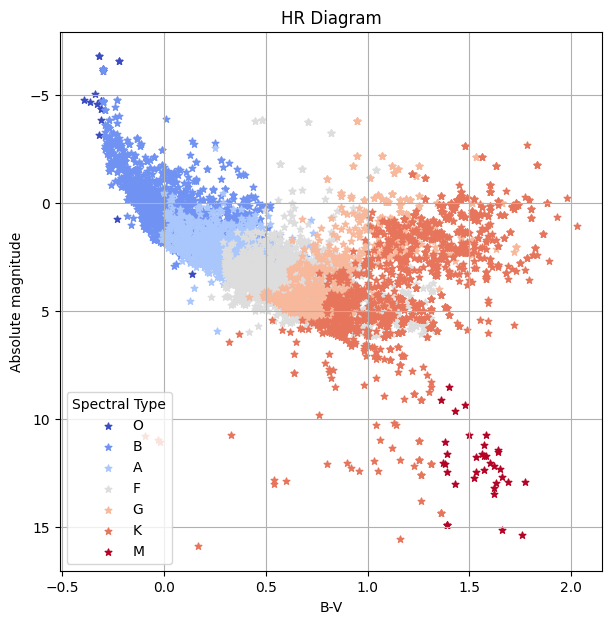

In [12]:
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

colormap = plt.get_cmap('coolwarm', len(spectral_types))

plt.figure(figsize=(7, 7))

for i, sp_type in enumerate(spectral_types):
    sp_type_data = mdf[mdf['Predicted_SpT'] == sp_type]
    color = colormap(i / len(spectral_types))  # Adjust the color based on position
    plt.scatter(sp_type_data['B-V'], sp_type_data['Absolute Mag'], s=25, color=color, marker="*", label=sp_type)

plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Diagram')

# Add a legend to the plot to label spectral types
plt.legend(title='Spectral Type', loc='lower left')

plt.grid(True)
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
from tqdm.notebook import tqdm_notebook as tqdm
import time
import joblib
import os


X = mdf[["B-V","Absolute Mag", "Vmag", "PSpT", "log.Teff [K]"]]

y = mdf["Mass Range"]

class_counts = mdf["Mass Range"].value_counts()
for class_label, count in class_counts.items():
    print(f"No of {class_label} originally in SpT: {count}")
print("\n")

desired_oversampling_ratio = 5000

# desired_oversampling_ratio1 = 100

sampling_strategy = {
    0: desired_oversampling_ratio,  # For class 'O'
    2:desired_oversampling_ratio,
    1:desired_oversampling_ratio,
    4:desired_oversampling_ratio,
    5:desired_oversampling_ratio,
    6:desired_oversampling_ratio,
    7:desired_oversampling_ratio,
    8:desired_oversampling_ratio,
    9:desired_oversampling_ratio,
    # 6: desired_oversampling_ratio
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

selected_features = ["B-V","Absolute Mag", "Vmag", "PSpT", "log.Teff [K]"]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

class_counts = y_train.value_counts()
for class_label, count in class_counts.items():
    print(f"No of training {class_label} in SpT: {count}")
    
print('\n---------------------------------------------------')

class_counts = y_test.value_counts()
for class_label, count in class_counts.items():
    print(f"No of testing {class_label} in SpT: {count}")

models = [
    ('Gradient Boosting', GradientBoostingClassifier(verbose=1, n_estimators=120, random_state=42)),
    ('Random Forest', RandomForestClassifier(verbose=1, n_estimators=400, random_state=42)),
    ('Support Vector Machine (SVM)', SVC(verbose=1, kernel='rbf')),
    ('Logistic Regression', LogisticRegression(verbose=1, max_iter=3000)),
    ('k-Nearest Neighbors (KNN)', KNeighborsClassifier(n_neighbors=50))
]
#output_folder = "./MassPredictionModels"
for model_name, model in tqdm(models, desc="Training models"):
    with tqdm(total=1, desc=f"Training {model_name}") as pbar:
        pbar.n = 0
        pbar.last_print_n = 0
        pbar.start_t = pbar.last_print_t = time.time()
        pbar.update(1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(accuracy_score))
        # Create the full path to save the model
        #model_path = os.path.join(output_folder, f'{model_name}.pkl')
        # Save the model to the specified folder
        #joblib.dump(model, model_path)
        
        print("\n")
        print(f"-------------------------Model: {model_name}-------------------------")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix: \n {cm}")
        print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")
        print("\n")


No of 3 originally in SpT: 5361
No of 4 originally in SpT: 2578
No of 5 originally in SpT: 480
No of 2 originally in SpT: 428
No of 6 originally in SpT: 215
No of 1 originally in SpT: 145
No of 0 originally in SpT: 66
No of 7 originally in SpT: 56
No of 8 originally in SpT: 17
No of 9 originally in SpT: 15


No of training 3 in SpT: 4242
No of training 2 in SpT: 4028
No of training 9 in SpT: 4026
No of training 0 in SpT: 4022
No of training 7 in SpT: 4011
No of training 1 in SpT: 3999
No of training 6 in SpT: 3998
No of training 5 in SpT: 3996
No of training 8 in SpT: 3991
No of training 4 in SpT: 3975

---------------------------------------------------
No of testing 3 in SpT: 1119
No of testing 4 in SpT: 1025
No of testing 8 in SpT: 1009
No of testing 5 in SpT: 1004
No of testing 6 in SpT: 1002
No of testing 1 in SpT: 1001
No of testing 7 in SpT: 989
No of testing 0 in SpT: 978
No of testing 9 in SpT: 974
No of testing 2 in SpT: 972


Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Training Gradient Boosting:   0%|          | 0/1 [00:00<?, ?it/s]

      Iter       Train Loss   Remaining Time 
         1           1.7441            4.26m
         2           1.4501            4.36m
         3           1.2497            4.33m
         4           1.0952            4.22m
         5           0.9769            4.21m
         6           0.8828            4.17m
         7           0.7991            4.09m
         8           0.7267            4.05m
         9           0.6672            4.04m
        10           0.6181            4.07m
        20           0.3574            3.59m
        30           0.2620            3.16m
        40           0.2051            2.75m
        50           0.1723            2.41m
        60           0.1507            2.05m
        70           0.1365            1.70m
        80           0.1253            1.35m
        90           0.1160            1.01m
       100           0.1089           40.00s
      Iter       Train Loss   Remaining Time 
         1           1.7456            2.11m
        

Training Random Forest:   0%|          | 0/1 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   34.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   22.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   22.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   25.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s




-------------------------Model: Random Forest-------------------------
Accuracy: 0.9726000198550581
Precision: 0.97273006317187
Recall: 0.9726000198550581
F1 Score: 0.9725576844521389
Confusion Matrix: 
 [[ 970    1    7    0    0    0    0    0    0    0]
 [   8  986    7    0    0    0    0    0    0    0]
 [  11   25  929    5    0    0    2    0    0    0]
 [   2    7   10 1086   14    0    0    0    0    0]
 [   0    0    0   18  958   47    2    0    0    0]
 [   0    0    0    0   17  978    9    0    0    0]
 [   1    2    1    0    1    4  990    3    0    0]
 [   0    0    0    0    0    0    0  939   50    0]
 [   0    0    0    0    0    0    0   20  989    0]
 [   0    0    0    0    0    0    0    1    1  972]]
Cross-Validation Accuracy: 0.9730689340467625




Training Support Vector Machine (SVM):   0%|          | 0/1 [00:00<?, ?it/s]

[LibSVM][LibSVM][LibSVM][LibSVM]

-------------------------Model: Support Vector Machine (SVM)-------------------------
Accuracy: 0.826566067705748
Precision: 0.8355498111145058
Recall: 0.826566067705748
F1 Score: 0.8259270400818747
Confusion Matrix: 
 [[962  16   0   0   0   0   0   0   0   0]
 [284 638  71   0   8   0   0   0   0   0]
 [ 67 100 801   0   4   0   0   0   0   0]
 [  9  12  77 927  94   0   0   0   0   0]
 [  0   9   2  54 802 158   0   0   0   0]
 [  0   0   0   0  80 829  88   7   0   0]
 [  0  13  19   0  20 115 739  96   0   0]
 [  0   0   0   0   0   0  68 798 123   0]
 [  0   0   0   0   0   0   0   0 996  13]
 [ 73   0   3  21   7  11   6   8  11 834]]
Cross-Validation Accuracy: 0.7993446592552494




Training Logistic Regression:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st



-------------------------Model: Logistic Regression-------------------------
Accuracy: 0.7028690558919884
Precision: 0.7098917746434044
Recall: 0.7028690558919884
F1 Score: 0.7004578062031879
Confusion Matrix: 
 [[747 214  17   0   0   0   0   0   0   0]
 [451 407 131   0  12   0   0   0   0   0]
 [ 59  36 745 131   1   0   0   0   0   0]
 [ 27   3 138 814 136   1   0   0   0   0]
 [ 48   0   1 131 673 143  29   0   0   0]
 [  0   0   0   0  85 660 222   5  21  11]
 [ 14   7  11   0   0 170 517 229  34  20]
 [  0   0   0   0   0   0  73 854   7  55]
 [  0   0   0   0   0   7  16 147 839   0]
 [ 71   0   0   6  17  16  20   3  17 824]]
Cross-Validation Accuracy: 0.7054458829750597




C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training k-Nearest Neighbors (KNN):   0%|          | 0/1 [00:00<?, ?it/s]



-------------------------Model: k-Nearest Neighbors (KNN)-------------------------
Accuracy: 0.907971805817532
Precision: 0.9091854796651108
Recall: 0.907971805817532
F1 Score: 0.9077692881240053
Confusion Matrix: 
 [[ 943   29    6    0    0    0    0    0    0    0]
 [  44  925   24    0    0    0    0    0    0    8]
 [  36   77  845    0    5    0    9    0    0    0]
 [   4   13   52  993   54    0    0    0    0    3]
 [   0    4    1   61  828  122    9    0    0    0]
 [   0    0    0    0   39  906   53    1    0    5]
 [   0   11   11    0    6   45  911   18    0    0]
 [   0    0    0    0    0    0   29  900   60    0]
 [   0    0    0    0    0    0    0    0 1008    1]
 [   8    0   20   25    5    2    7    6   14  887]]
Cross-Validation Accuracy: 0.8964455589595878




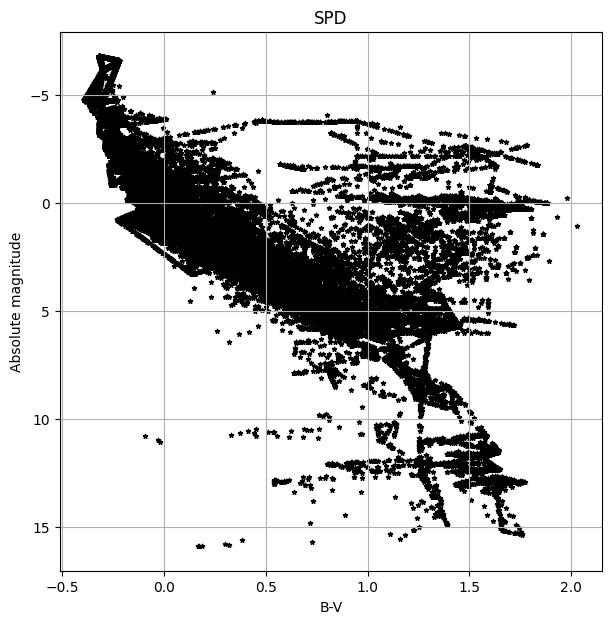

Epoch 1/80
756/756 [==============================] - 6s 7ms/step - loss: 1.0813 - accuracy: 0.5840 - val_loss: 0.7886 - val_accuracy: 0.6860
Epoch 2/80
756/756 [==============================] - 5s 7ms/step - loss: 0.5682 - accuracy: 0.8150 - val_loss: 0.4722 - val_accuracy: 0.8484
Epoch 3/80
756/756 [==============================] - 5s 7ms/step - loss: 0.3839 - accuracy: 0.8756 - val_loss: 0.3529 - val_accuracy: 0.8747
Epoch 4/80
756/756 [==============================] - 5s 7ms/step - loss: 0.3136 - accuracy: 0.8958 - val_loss: 0.3171 - val_accuracy: 0.9002
Epoch 5/80
756/756 [==============================] - 5s 7ms/step - loss: 0.2696 - accuracy: 0.9111 - val_loss: 0.2418 - val_accuracy: 0.9275
Epoch 6/80
756/756 [==============================] - 5s 6ms/step - loss: 0.2440 - accuracy: 0.9178 - val_loss: 0.2281 - val_accuracy: 0.9279
Epoch 7/80
756/756 [==============================] - 5s 6ms/step - loss: 0.2201 - accuracy: 0.9261 - val_loss: 0.2187 - val_accuracy: 0.9266
Epoch 

KeyboardInterrupt: 

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize

def custom_arctan(x):
    return tf.math.atan(x)

def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))


plt.figure(figsize=(7, 7)) 
plt.scatter(X_resampled['B-V'], X_resampled['Absolute Mag'], s=10,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('SPD')

plt.grid(True)
plt.show()

pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca = normalize(X_train_pca)
X_test_pca = normalize(X_test_pca)
neural_net = models.Sequential([
    #layers.Input(shape=(X_train_pca.shape[1])),  # Input layer with reduced features
    layers.Input(shape=(5,)),
    # layers.Dense(128, activation=gelu),  # Hidden layer with 64 neurons and tanh activation
    # layers.Dense(65, activation=gelu),  # Hidden layer with 32 neurons and tanh activation
    # layers.Dense(33, activation=gelu),  # Hidden layer with 32 neurons and tanh activation
    layers.Dense(512, activation='tanh'),
    layers.Dense(256, activation='tanh'),
    
    layers.Dense(10, activation='softmax')  # Output layer with 7 neurons (for spectral classes) and softmax activation
])

opt = keras.optimizers.Adam(learning_rate=0.001)
neural_net.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

neural_net.fit(X_train_pca, y_train, epochs=80, batch_size=32, validation_split=0.4)

test_loss, test_accuracy = neural_net.evaluate(X_test_pca, y_test)
print(f"Test accuracy: {test_accuracy}")

k = 3

skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = []
for train_index, test_index in skf.split(X_train_pca, y_train):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]  # Corrected

    neural_net.fit(X_train_cv, y_train_cv, epochs=20, batch_size=32, verbose=0)

    _, accuracy = neural_net.evaluate(X_test_cv, y_test_cv, verbose=0)
    cv_scores.append(accuracy)


print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = []

for train_index, test_index in skf.split(X_train_pca, y_train):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    neural_net.fit(X_train_cv, y_train_cv, epochs=20, batch_size=64, verbose=0)

    _, accuracy = neural_net.evaluate(X_test_cv, y_test_cv, verbose=0)
    cv_scores.append(accuracy)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
# tf.test.is_gpu_available()
from sklearn.metrics import confusion_matrix

y_pred = neural_net.predict(X_test_pca)
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)


In [64]:
output_folder = "./MassPredictionModels"
model_path = os.path.join(output_folder, 'neural_net.h5')
joblib.dump(neural_net, model_path)

['./MassPredictionModels\\neural_net.h5']

In [71]:
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

nn_model = joblib.load("./MassPredictionModels/neural_net.pkl")
random_forest = joblib.load("./MassPredictionModels/Random Forest.pkl")
gradient_boosting = joblib.load("./MassPredictionModels/Gradient Boosting.pkl")

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

keras_classifier = KerasClassifier(nn_model)

base_models = [
    ('NeuralNetwork', keras_classifier),
    ('RandomForest', random_forest),
    ('GradientBoosting', gradient_boosting)
]

meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

stacking_ensemble = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_ensemble.fit(X_train_pca, y_train)

stacking_predictions = stacking_ensemble.predict(X_test_pca)

stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy}")


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmp5bs8_c3k\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmp5bs8_c3k\assets


1259/1259 [==============================] - 12s 9ms/step - loss: 0.1018 - accuracy: 0.1030


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   51.7s


      Iter       Train Loss   Remaining Time 
         1           1.8145            6.13m
         2           1.5577            6.12m
         3           1.3746            6.03m
         4           1.2307            6.25m
         5           1.1124            6.00m
         6           1.0136            5.91m
         7           0.9314            5.80m
         8           0.8608            5.64m
         9           0.7986            5.55m
        10           0.7482            5.49m
        20           0.4505            4.98m
        30           0.3337            4.50m
        40           0.2726            4.05m
        50           0.2329            3.49m
        60           0.2061            2.97m
        70           0.1863            2.47m
        80           0.1692            1.97m
        90           0.1567            1.47m
       100           0.1466           58.55s
INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpmj6g379l\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpmj6g379l\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmp0nd605p9\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmp0nd605p9\assets


252/252 [==============================] - 1s 4ms/step
INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpmj1cx0ft\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpmj1cx0ft\assets


252/252 [==============================] - 1s 3ms/step
INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpcb4emqtv\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpcb4emqtv\assets


252/252 [==============================] - 1s 4ms/step


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpjfpwl96p\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpjfpwl96p\assets


252/252 [==============================] - 1s 3ms/step
INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpg37h2tsl\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpg37h2tsl\assets


252/252 [==============================] - 1s 3ms/step


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   41.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   41.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   43.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   43.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Do

      Iter       Train Loss   Remaining Time 
         1           1.8205            4.36m
         2           1.5671            4.17m
         3           1.3784            4.07m
         4           1.2334            4.01m
         5           1.1116            4.09m
         6           1.0139            4.11m
         7           0.9297            4.07m
         8           0.8603            4.06m
         9           0.7960            4.02m
        10           0.7455            4.01m
        20           0.4478            3.65m
        30           0.3349            3.30m
        40           0.2706            3.02m
        50           0.2299            2.65m
        60           0.2030            2.30m
        70           0.1823            1.92m
        80           0.1668            1.55m
        90           0.1553            1.16m
       100           0.1454           46.33s
      Iter       Train Loss   Remaining Time 
         1           1.8185            4.34m
        

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.9s


Stacking Ensemble Accuracy: 0.9726992951454383


In [73]:
import joblib
joblib.dump(stacking_ensemble, './MassPredictionModels/stacking_ensemble_model.pkl')


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpfn102enj\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmpfn102enj\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmplm0azgad\assets


INFO:tensorflow:Assets written to: C:\Users\keera\AppData\Local\Temp\tmplm0azgad\assets


['./MassPredictionModels/stacking_ensemble_model.pkl']

In [73]:
import joblib
gradient_boosting = joblib.load("./MassPredictionModels/Random Forest.pkl")
import pandas as pd
import numpy as np

bv = -1
plx = 0.27
vmag = 8.9
spType = 'O'

# Calculate Absolute Magnitude
absolute_mag = (vmag + 5 * (np.log10(plx/100)))

# Calculate Temperature
bv = float(bv)
# temperature = 4600 * (1 / (0.92 * bv + 1.7) + 1 / (0.92 * bv + 0.62))
def estimate_temperature(BV):
    if BV < -0.5:
        temperature = 10000  # Hot stars, e.g., O-type
    elif -0.5 <= BV < 0.2:
        temperature = 10000 - 5000 * (BV + 0.5)  # Linear decrease from 10,000 K to 5,000 K
    elif 0.2 <= BV < 1.5:
        temperature = 5000 - 4000 * (BV - 0.2)  # Linear decrease from 5,000 K to 1,000 K
    else:
        temperature = 500  # Cool stars, e.g., M-type

    return temperature
temperature = estimate_temperature(bv)
temperature = np.log10(temperature)
print(temperature)

# Load spectral type mapping
spectral_type_mapping = {
    "O": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "G": 4,
    "K": 5,
    "M": 6
}

# Map the user input spectral type to a numerical value
predicted_spType = spectral_type_mapping.get(spType, -1)

input_data = pd.DataFrame({
    'B-V': [bv],
    'Absolute Mag': [absolute_mag],
    'Vmag': [vmag],
    'PSpT': [predicted_spType],
    'log.Teff [K]': [temperature],
})


4.0


In [74]:
# BV = -2
# BC = -4100 * BV**3 + 2300 * BV**2 + 6500 * BV + 2200
# T_eff =  (BV + BC)
# print(T_eff)

In [75]:
mass_prediction = gradient_boosting.predict(input_data)
print("Predicted Mass Range:", mass_prediction[0])
print("Absolute Mag:", absolute_mag)
print("Temp:", temperature)

Predicted Mass Range: 8
Absolute Mag: -3.9431811792050624
Temp: 4.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
